<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.


In [ ]:
#!pip install yfinance==0.2.38
#!pip install pandas==2.2.2
#!pip install nbformat

In [ ]:
!pip install yfinance
!pip install bs4
!pip install nbformat

In [ ]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [ ]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**


In [ ]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

Use the make_graph function that we’ve already defined. You’ll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard. 
> **Note: You don’t need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing function.**


## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [2]:
import yfinance as yf

tesla_ticker = yf.Ticker("TSLA")
tesla_data = tesla_ticker.history(period="1y")

tesla_data.reset_index(inplace=True)


print(tesla_data.head())


                       Date        Open        High         Low       Close  \
0 2023-07-27 00:00:00-04:00  268.309998  269.130005  255.300003  255.710007   
1 2023-07-28 00:00:00-04:00  259.859985  267.250000  258.230011  266.440002   
2 2023-07-31 00:00:00-04:00  267.480011  269.079987  263.779999  267.429993   
3 2023-08-01 00:00:00-04:00  266.260010  266.470001  260.250000  261.070007   
4 2023-08-02 00:00:00-04:00  255.570007  259.519989  250.490005  254.110001   

      Volume  Dividends  Stock Splits  
0  103697300        0.0           0.0  
1  111446000        0.0           0.0  
2   84582200        0.0           0.0  
3   83166000        0.0           0.0  
4  101752900        0.0           0.0  


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [3]:
import yfinance as yf

tesla_ticker = yf.Ticker("TSLA")
tesla_data = tesla_ticker.history(period="max")
tesla_data.reset_index(inplace=True)
print(tesla_data.head())


                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [4]:
# Importar la biblioteca yfinance
import yfinance as yf

# Pregunta 1: Usar yfinance para extraer datos de acciones
# Crear un objeto Ticker para Tesla
tesla_ticker = yf.Ticker("TSLA")

# Descargar los datos históricos de Tesla
tesla_data = tesla_ticker.history(period="max")

# Restablecer el índice del DataFrame
tesla_data.reset_index(inplace=True)

# Mostrar las primeras cinco filas del DataFrame
print(tesla_data.head())


                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [8]:
import requests

# URL datos de ingresos de Tesla
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'

response = requests.get(url)

html_data = response.text

print(html_data[:500])



<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />
	


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`. Make sure to use the `html_data` with the content parameter as follow `html_data.content` .


In [12]:
pip install beautifulsoup4 html5lib

Note: you may need to restart the kernel to use updated packages.


Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


In [24]:
import pandas as pd

# Leer directamente la tabla desde la URL
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'

# Leer todas las tablas de la página
tables = pd.read_html(url)

# Mostrar el nombre de las tablas disponibles para encontrar la correcta
print("Número de tablas encontradas:", len(tables))
print("Primeras filas de las tablas encontradas:")
for i, table in enumerate(tables):
    print(f"Tabla {i}:\n", table.head())

# Identificar la tabla relevante que contiene "Tesla Quarterly Revenue"
# Suponiendo que la tabla relevante es la primera tabla (puede que necesites ajustar el índice)
tesla_revenue = tables[0]

# Renombrar las columnas para asegurarse de que sean "Date" y "Revenue"
tesla_revenue.columns = ["Date", "Revenue"]

# Mostrar las primeras filas del DataFrame para verificar
print(tesla_revenue.head())


Número de tablas encontradas: 6
Primeras filas de las tablas encontradas:
Tabla 0:
    Tesla Annual Revenue (Millions of US $)  \
0                                     2021   
1                                     2020   
2                                     2019   
3                                     2018   
4                                     2017   

  Tesla Annual Revenue (Millions of US $).1  
0                                   $53,823  
1                                   $31,536  
2                                   $24,578  
3                                   $21,461  
4                                   $11,759  
Tabla 1:
   Tesla Quarterly Revenue (Millions of US $)  \
0                                 2022-09-30   
1                                 2022-06-30   
2                                 2022-03-31   
3                                 2021-12-31   
4                                 2021-09-30   

  Tesla Quarterly Revenue (Millions of US $).1  
0              

<details><summary>Step-by-step instructions</summary>

```

Here are the step-by-step instructions:

1. Find All Tables: Start by searching for all HTML tables on a webpage using `soup.find_all('table')`.
2. Identify the Relevant Table: then loops through each table. If a table contains the text “Tesla Quarterly Revenue,”, select that table.
3. Initialize a DataFrame: Create an empty Pandas DataFrame called `tesla_revenue` with columns “Date” and “Revenue.”
4. Loop Through Rows: For each row in the relevant table, extract the data from the first and second columns (date and revenue).
5. Clean Revenue Data: Remove dollar signs and commas from the revenue value.
6. Add Rows to DataFrame: Create a new row in the DataFrame with the extracted date and cleaned revenue values.
7. Repeat for All Rows: Continue this process for all rows in the table.

```
</details>


<details><summary>Step-by-step instructions</summary>

```

Here are the step-by-step instructions:

1. Find All Tables: Start by searching for all HTML tables on a webpage using `soup.find_all('table')`.
2. Identify the Relevant Table: then loops through each table. If a table contains the text “Tesla Quarterly Revenue,”, select that table.
3. Initialize a DataFrame: Create an empty Pandas DataFrame called `tesla_revenue` with columns “Date” and “Revenue.”
4. Loop Through Rows: For each row in the relevant table, extract the data from the first and second columns (date and revenue).
5. Clean Revenue Data: Remove dollar signs and commas from the revenue value.
6. Add Rows to DataFrame: Create a new row in the DataFrame with the extracted date and cleaned revenue values.
7. Repeat for All Rows: Continue this process for all rows in the table.

```
</details>


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
```

</details>


In [26]:
import pandas as pd

url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'

tables = pd.read_html(url)

tesla_revenue = tables[1]

tesla_revenue.columns = ["Date", "Revenue"]

# Mostrar las primeras filas del DataFrame para verificar
print(tesla_revenue.head())


         Date  Revenue
0  2022-09-30  $21,454
1  2022-06-30  $16,934
2  2022-03-31  $18,756
3  2021-12-31  $17,719
4  2021-09-30  $13,757


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [27]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

In [28]:
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].replace('[\$,]', '', regex=True).astype(float)

print(tesla_revenue.head())


         Date  Revenue
0  2022-09-30  21454.0
1  2022-06-30  16934.0
2  2022-03-31  18756.0
3  2021-12-31  17719.0
4  2021-09-30  13757.0


Execute the following lines to remove an null or empty strings in the Revenue column.


In [30]:
import pandas as pd

url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'

tables = pd.read_html(url)

tesla_revenue = tables[1]

tesla_revenue.columns = ["Date", "Revenue"]

tesla_revenue['Revenue'] = tesla_revenue['Revenue'].replace('[\$,]', '', regex=True).astype(float)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'].notnull() & (tesla_revenue['Revenue'] != '')]
print(tesla_revenue.head())


         Date  Revenue
0  2022-09-30  21454.0
1  2022-06-30  16934.0
2  2022-03-31  18756.0
3  2021-12-31  17719.0
4  2021-09-30  13757.0


In [29]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [31]:
pip install yfinance


Note: you may need to restart the kernel to use updated packages.


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [32]:
import yfinance as yf

# Crear un objeto Ticker para GameStop (símbolo: GME)
gme_ticker = yf.Ticker("GME")

# Obtener el historial de precios de las acciones
gme_data = gme_ticker.history(period="5d")  # Últimos 5 días

# Mostrar las primeras filas del DataFrame para verificar
print(gme_data.head())


                                Open       High        Low      Close  \
Date                                                                    
2024-07-22 00:00:00-04:00  24.840000  25.980000  24.379999  25.219999   
2024-07-23 00:00:00-04:00  25.219999  25.680000  24.889999  25.500000   
2024-07-24 00:00:00-04:00  25.150000  25.450001  23.930000  24.010000   
2024-07-25 00:00:00-04:00  23.590000  24.590000  23.360001  23.950001   
2024-07-26 00:00:00-04:00  24.280001  24.770000  24.110001  24.129999   

                             Volume  Dividends  Stock Splits  
Date                                                          
2024-07-22 00:00:00-04:00  14090400        0.0           0.0  
2024-07-23 00:00:00-04:00   7921700        0.0           0.0  
2024-07-24 00:00:00-04:00   9549200        0.0           0.0  
2024-07-25 00:00:00-04:00   8567700        0.0           0.0  
2024-07-26 00:00:00-04:00   6796000        0.0           0.0  


**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [36]:
import yfinance as yf


gme_ticker = yf.Ticker("GME")


gme_data = gme_ticker.history(period="5d")  # Últimos 5 días

gme_data.reset_index(inplace=True)


print(gme_data.head())


                       Date       Open       High        Low      Close  \
0 2024-07-22 00:00:00-04:00  24.840000  25.980000  24.379999  25.219999   
1 2024-07-23 00:00:00-04:00  25.219999  25.680000  24.889999  25.500000   
2 2024-07-24 00:00:00-04:00  25.150000  25.450001  23.930000  24.010000   
3 2024-07-25 00:00:00-04:00  23.590000  24.590000  23.360001  23.950001   
4 2024-07-26 00:00:00-04:00  24.280001  24.770000  24.110001  24.129999   

     Volume  Dividends  Stock Splits  
0  14090400        0.0           0.0  
1   7921700        0.0           0.0  
2   9549200        0.0           0.0  
3   8567700        0.0           0.0  
4   6796000        0.0           0.0  


In [33]:
info = gme_ticker.info
print(info)


{'address1': '625 Westport Parkway', 'city': 'Grapevine', 'state': 'TX', 'zip': '76051', 'country': 'United States', 'phone': '817 424 2000', 'website': 'https://www.gamestop.com', 'industry': 'Specialty Retail', 'industryKey': 'specialty-retail', 'industryDisp': 'Specialty Retail', 'sector': 'Consumer Cyclical', 'sectorKey': 'consumer-cyclical', 'sectorDisp': 'Consumer Cyclical', 'longBusinessSummary': 'GameStop Corp., a specialty retailer, provides games and entertainment products through its stores and ecommerce platforms in the United States, Canada, Australia, and Europe. The company sells new and pre-owned gaming platforms; accessories, such as controllers, gaming headsets, and virtual reality products; new and pre-owned gaming software; and in-game digital currency, digital downloadable content, and full-game downloads. It sells collectibles comprising apparel, toys, trading cards, gadgets, and other retail products for pop culture and technology enthusiasts, as well as engages 

In [34]:
dividends = gme_ticker.dividends
print(dividends.head())


Series([], Name: Dividends, dtype: float64)


In [35]:
splits = gme_ticker.splits
print(splits.head())


Series([], Name: Stock Splits, dtype: float64)


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.


In [37]:
import requests
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'
response = requests.get(url)
html_data_2 = response.text
print(html_data_2[:500])


<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class=" js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface g


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [40]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.


In [44]:
import pandas as pd

# URL de la página web
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'

# Leer todas las tablas en la página web
tables = pd.read_html(url)

# Asumimos que la tabla relevante es la primera en la lista
gme_revenue = tables[0]

# Renombrar las columnas para que sean 'Date' y 'Revenue'
gme_revenue.columns = ['Date', 'Revenue']

# Limpiar los datos de la columna 'Revenue'
gme_revenue['Revenue'] = gme_revenue['Revenue'].replace('[\$,]', '', regex=True).astype(float)

# Mostrar las primeras filas del DataFrame para verificar
print(gme_revenue.head())


   Date  Revenue
0  2020   6466.0
1  2019   8285.0
2  2018   8547.0
3  2017   7965.0
4  2016   9364.0


> **Note: Use the method similar to what you did in question 2.**  


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [45]:
import pandas as pd

# URL de la página web
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'

# Leer todas las tablas en la página web
tables = pd.read_html(url)

# Seleccionar la tabla relevante (índice 1)
gme_revenue = tables[1]

# Renombrar las columnas para que sean 'Date' y 'Revenue'
gme_revenue.columns = ['Date', 'Revenue']

# Limpiar los datos de la columna 'Revenue'
gme_revenue['Revenue'] = gme_revenue['Revenue'].replace('[\$,]', '', regex=True).astype(float)

# Mostrar las primeras filas del DataFrame para verificar
print(gme_revenue.head())


         Date  Revenue
0  2020-04-30   1021.0
1  2020-01-31   2194.0
2  2019-10-31   1439.0
3  2019-07-31   1286.0
4  2019-04-30   1548.0


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [47]:
import pandas as pd

# URL de la página web
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'

# Leer todas las tablas en la página web
tables = pd.read_html(url)

# Seleccionar la tabla relevante (índice 1)
gme_revenue = tables[1]

# Renombrar las columnas para que sean 'Date' y 'Revenue'
gme_revenue.columns = ['Date', 'Revenue']

# Limpiar los datos de la columna 'Revenue'
gme_revenue['Revenue'] = gme_revenue['Revenue'].replace('[\$,]', '', regex=True).astype(float)

# Mostrar las primeras filas del DataFrame para verificar
print(gme_revenue.head())



         Date  Revenue
0  2020-04-30   1021.0
1  2020-01-31   2194.0
2  2019-10-31   1439.0
3  2019-07-31   1286.0
4  2019-04-30   1548.0


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`.

```
    
</details>


In [114]:
pip install yfinance pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


Rango de fechas en los datos de Tesla: 2018-06-30 00:00:00 a 2021-06-29 00:00:00-04:00


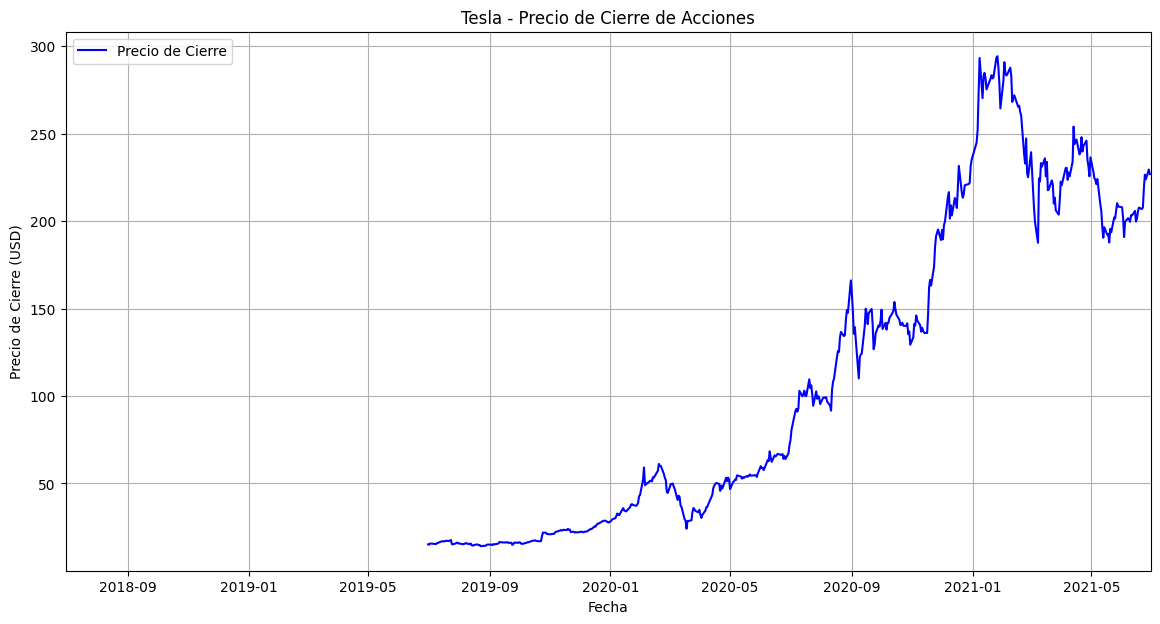

In [136]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, title):
    plt.figure(figsize=(14, 7))

   
    stock_data.index = pd.to_datetime(stock_data.index)


    plt.plot(stock_data.index, stock_data['Close'], label='Precio de Cierre', color='blue')

  
    if revenue_data is not None:
        revenue_data['Date'] = pd.to_datetime(revenue_data['Date'])
        plt.plot(revenue_data['Date'], revenue_data['Revenue'], label='Ingresos', color='orange')

   
    plt.title(f'{title} - Precio de Cierre de Acciones')
    plt.xlabel('Fecha')
    plt.ylabel('Precio de Cierre (USD)')
    plt.legend()
    plt.grid(True)

    # Limitar el rango de fechas hasta junio de 2021
    min_date = pd.to_datetime('2018-06-30')
    max_date = pd.to_datetime('2021-06-30')

    # Mostrar el rango de fechas para depuración
    print(f"Rango de fechas en los datos de Tesla: {min_date} a {stock_data.index.max()}")

    # Asegúrate de que las fechas no sean NaN y que max_date sea mayor que min_date
    if pd.isnull(min_date) or pd.isnull(max_date) or max_date < min_date:
        raise ValueError(f"Límites de fechas inválidos: min_date={min_date}, max_date={max_date}")

    plt.xlim(min_date, max_date)

    # Mostrar la gráfica
    plt.show()

# Descargar datos históricos de acciones para Tesla
tesla_data = yf.Ticker("TSLA").history(start="2019-06-30", end="2021-06-30")

# Si no se tienen datos de ingresos, establecer como None
tesla_revenue = None  # O reemplaza esto con el DataFrame de ingresos si está disponible

# Llamar a la función para graficar los datos de Tesla
make_graph(tesla_data, tesla_revenue, 'Tesla')


## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`

```
    
</details>


Rango de fechas en los datos de GAMESTOP: 2018-06-30 00:00:00 a 2021-06-29 00:00:00-04:00


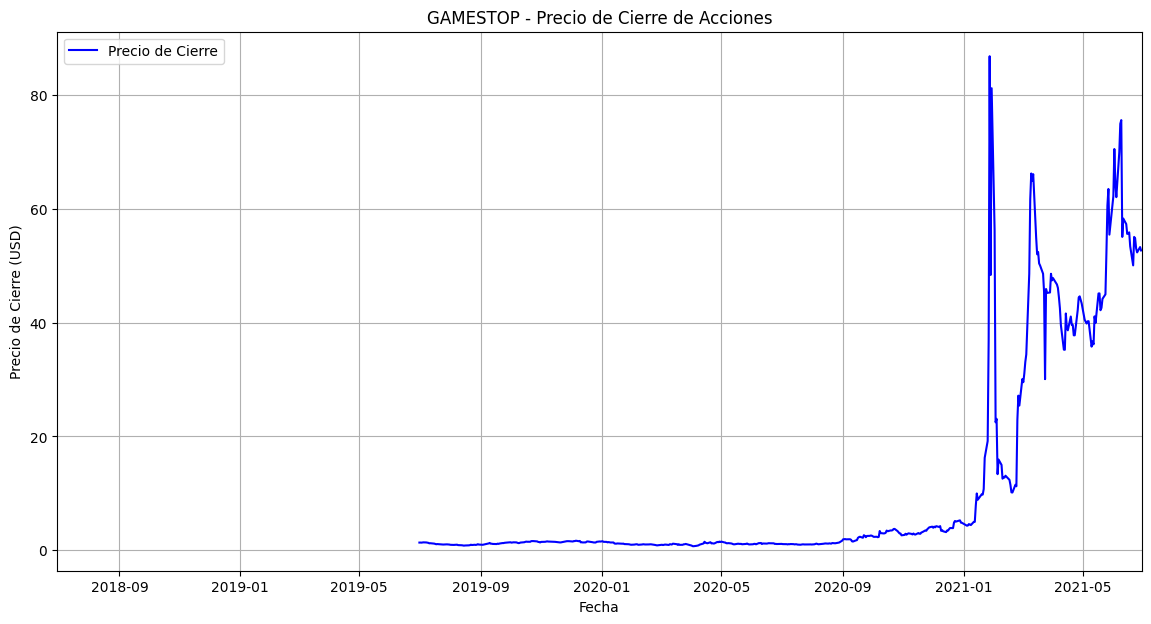

In [135]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, title):
    plt.figure(figsize=(14, 7))


    stock_data.index = pd.to_datetime(stock_data.index)

    plt.plot(stock_data.index, stock_data['Close'], label='Precio de Cierre', color='blue')

    
    if revenue_data is not None:
        revenue_data['Date'] = pd.to_datetime(revenue_data['Date'])
        plt.plot(revenue_data['Date'], revenue_data['Revenue'], label='Ingresos', color='orange')

    plt.title(f'{title} - Precio de Cierre de Acciones')
    plt.xlabel('Fecha')
    plt.ylabel('Precio de Cierre (USD)')
    plt.legend()
    plt.grid(True)

    # Limitar el rango de fechas hasta junio de 2021
    min_date = pd.to_datetime('2018-06-30')
    max_date = pd.to_datetime('2021-06-30')

    print(f"Rango de fechas en los datos de GAMESTOP: {min_date} a {stock_data.index.max()}")


    if pd.isnull(min_date) or pd.isnull(max_date) or max_date < min_date:
        raise ValueError(f"Límites de fechas inválidos: min_date={min_date}, max_date={max_date}")

    plt.xlim(min_date, max_date)

    plt.show()

gamestop_data = yf.Ticker("GME").history(start="2019-06-30", end="2021-06-30")

Gamestop_revenue = None  # O reemplaza esto con el DataFrame de ingresos si está disponible

# función para graficar los datos de GAMESTOP
make_graph(gamestop_data, tesla_revenue, 'GAMESTOP')

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

```toggle ## Change Log
```
```toggle | Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
```
```toggle | ----------------- | ------- | ------------- | ------------------------- |
```
```toggle | 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
```
```toggle | 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
```
```toggle | 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |
```
